In [81]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [133]:
# Gaussian Example

sig = 5.0       # Gaussian sigma
a   = 0          # Gaussian parameter a (Griffiths)
l   = 0.5            # wavenumber of particle

def update():
    a= 1/(4*sig**2) # Gaussian parameter a (Griffiths)
    print("sig = ", 1/(2*a**0.5))
    print("a = ", 1/(4*sig**2))
    
update()
    

def psi(x):
    return (2*a/np.pi)**0.25*np.exp(-a*x**2)*np.exp(1j*l*x)

def tpsi(x,t):
    top = complex(1,-2*1j*a*t)
    bot = (1+4*(a*t)**2)
    ogammasq = top/bot 
    ogamma   = np.sqrt(top)/np.sqrt(bot)
    #gammasq = 1
    #gamma   = 1    
    return (2*a/np.pi)**0.25*ogamma * np.exp(-a*(x-l*t)**2*ogammasq)*np.exp(1j*l*(x-l*t/2))

xf = np.linspace(-50,50,1000)
t=0.0

plt.plot(xf,np.real(tpsi(xf,t)),"b-")
plt.plot(xf,np.imag(tpsi(xf,t)),"r-")
plt.plot(xf,np.absolute(tpsi(xf,t)),"k-")

sig =  5.0
a =  0.01


<IPython.core.display.Javascript object>


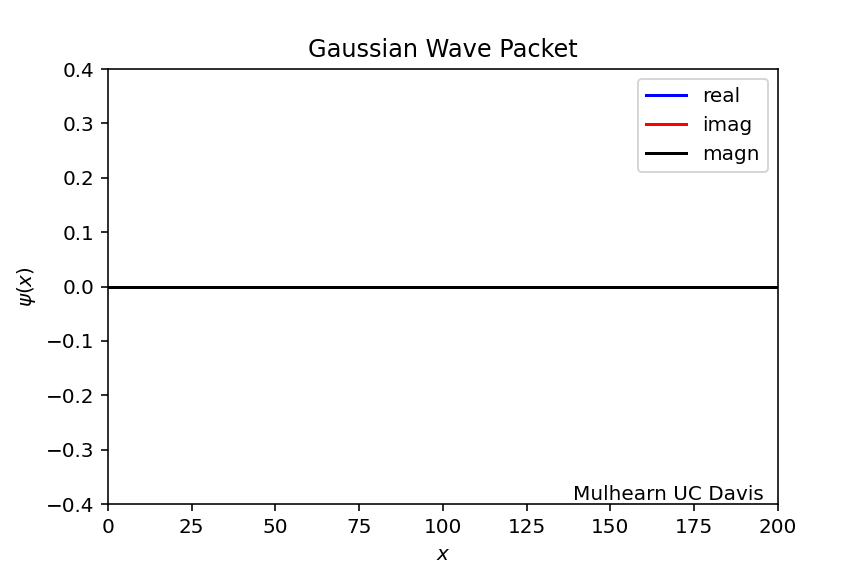

In [137]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

#uncomment for full resolution video:
#fig = plt.figure(figsize=(16, 9), dpi=(1920/16))
ax = plt.gca()  # Get current axes

xf = np.linspace(0,200,1000)
ax .set_xlim (0,200)
ax . set_ylim (-0.4,0.4)
la , = ax. plot ([], [], "b-",label="real")
lb , = ax. plot ([], [], "r-",label="imag")
lc , = ax. plot ([], [], "k-",label="magn")

ax .set_xlabel("$x$")
ax .set_ylabel("$\psi(x)$")
ax .set_title("Gaussian Wave Packet")
def animate (i):
    i = i%70    
    #psif = tpsi(xf-10,i*20)
    psif = tpsi(xf-10,i*20
    la. set_data (xf,np.real(psif))
    lb. set_data (xf,np.imag(psif))
    lc. set_data (xf,np.absolute(psif))    
    plt.legend()

plt.text(0.98, 0.01, 'Mulhearn UC Davis',transform = ax.transAxes, horizontalalignment='right')
#plt.text(0.01, 0.95, r"$L = 1$,", transform = ax.transAxes, horizontalalignment='left')
#plt.text(0.16, 0.95, r"$\tau = m L^2 /\hbar$", transform = ax.transAxes, horizontalalignment='left')
#plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
#plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')


#plt.text(0.01, 0.01, r"1 second = {}$\tau$".format(1), transform = ax.transAxes, horizontalalignment='right')


#anim = FuncAnimation (plt .gcf () , animate , frames =70 , interval =20 , repeat = True )
anim = FuncAnimation (plt .gcf () , animate , frames =4*70 , interval =50 , repeat = False )
    
# Set up formatting for the movie files
#Writer = writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Mulhearn'), bitrate=3600)
#anim.save('packet.mp4', writer=writer)

